## EDA AND PREPROCESSING ON DATASET 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,r2_score
import joblib
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Data/flight_fare.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# Droping the row which contains null value
df.dropna(inplace=True)

In [8]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Creating a list that contains all the columns

In [13]:
clm_lst = list(df.columns)
clm_lst

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

Get all the unique value in `df` columns

In [21]:
for i in clm_lst:
    print(i)
    print(df[i].unique())
    print(np.count_nonzero(df[i].unique()))
    print('\n')

Airline
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
12


Date_of_Journey
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
44


Source
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
5


Destination
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
6


Route
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'

In this data there are 5 `Source` and 6 `Desnination` city and
12 unique `Airlines` and `stops` range from 0-4

In [22]:
# drop Route because we have number of stops
df.drop('Route',axis=1,inplace=True)

In [28]:
# Extracting the month and day from Date_Of_Journey
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Day_of_journey'] = df['Date_of_Journey'].dt.day
df['month_of_journey'] = df['Date_of_Journey'].dt.month

In [30]:
# drop date_of_journey feature
df.drop('Date_of_Journey',axis=1,inplace=True)

In [31]:
# Extracting hour and minute from Arrival_time and Dep_time
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [33]:
# drop Arrival_time and Dep_time from df
df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [34]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,month_of_journey,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [35]:
# coverting categorical value to numerical
stp_cvt = [1,2,3,4,0]
stp_lst = ['non-stop', '2 stops', '1 stop', '3 stops', '4 stops']
stp_lst.sort()
print(stp_lst)

['1 stop', '2 stops', '3 stops', '4 stops', 'non-stop']


In [36]:
for i,j in zip(stp_lst, stp_cvt):
    df['Total_Stops'].replace(i,j,inplace=True)

In [38]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [39]:
# get the value count of airlines
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Displaying  price according to Arline

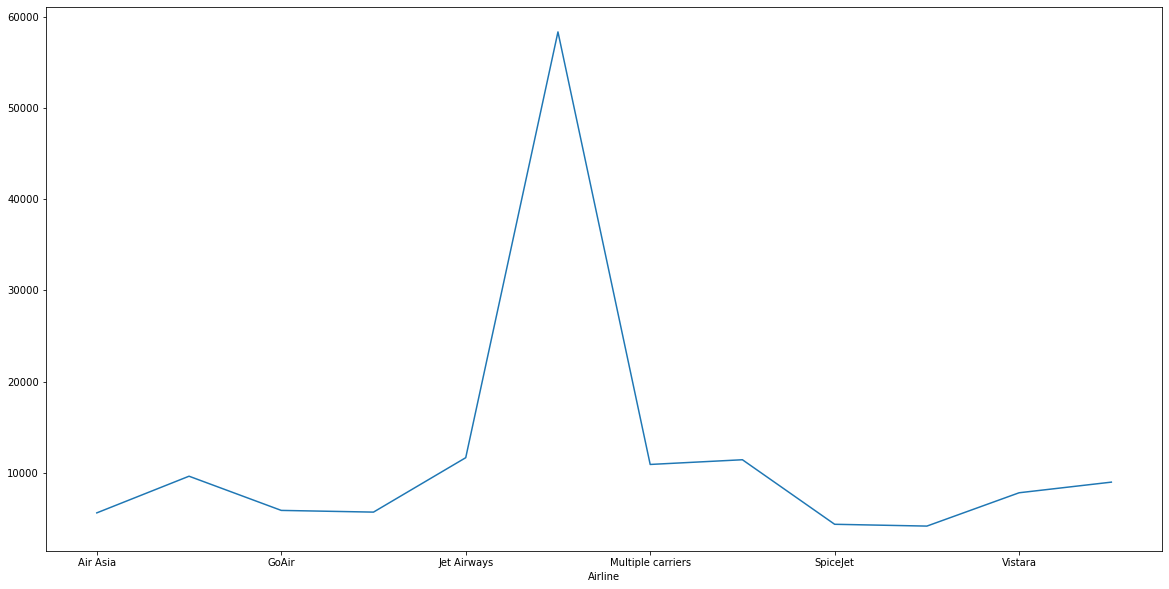

In [40]:
df.groupby('Airline')['Price'].mean().plot(figsize=(20,10))

avg price according to Airline

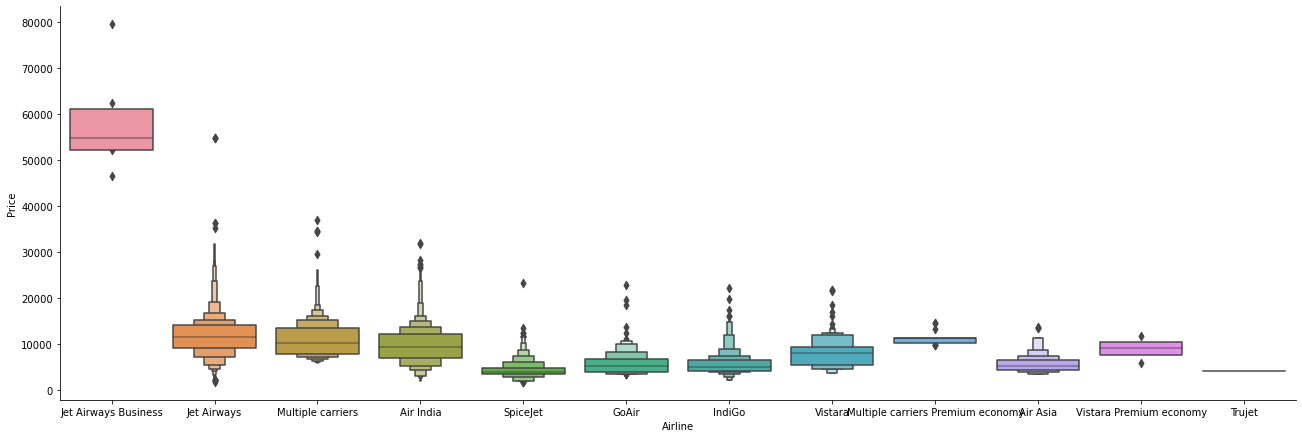

In [41]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Creating Dummies because airline column is nominal data

In [42]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


checking the source value count and destination value count

In [43]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [44]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

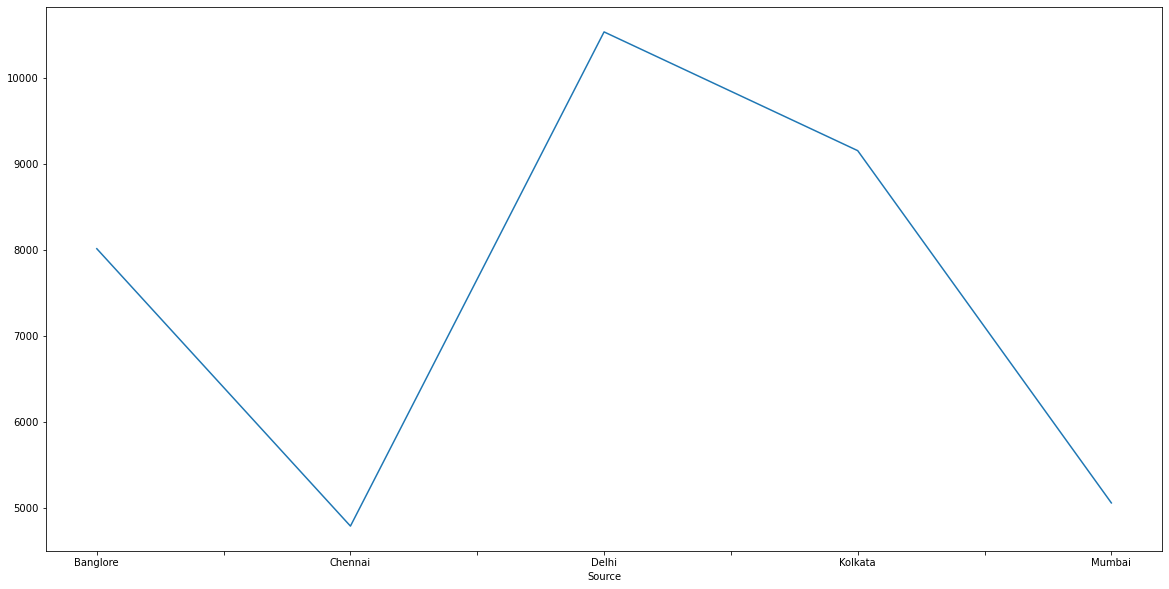

In [45]:
# avg price according to source
df.groupby('Source')['Price'].mean().plot(figsize=(20,10))

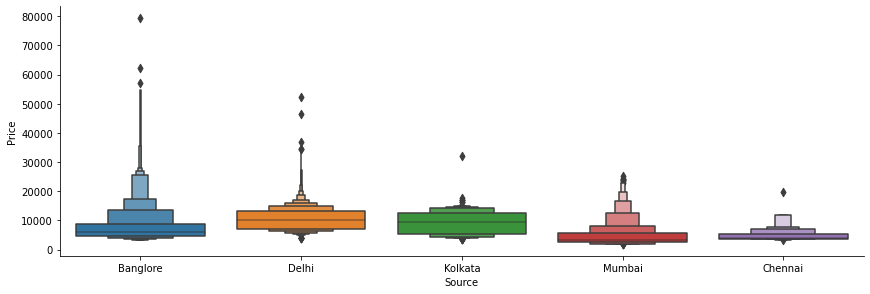

In [47]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

Creating Dummies because `Source` and `Destination` column is nominal data

In [48]:
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

In [49]:
Source.head(2)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0


In [50]:
Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [51]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,month_of_journey,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,3,1,21,35,16,50


In [53]:
# drop Airline,Source,Destination and Additional_info
df.drop(['Airline','Source','Destination','Additional_Info'],axis=1,inplace=True)

In [55]:
# concating the dummies created
df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [56]:
df.head(1)

,Duration,Total_Stops,Price,Day_of_journey,month_of_journey,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,0,3897,24,3,1,10,22,20,0,...,0,0,0,0,0,0,0,0,0,1


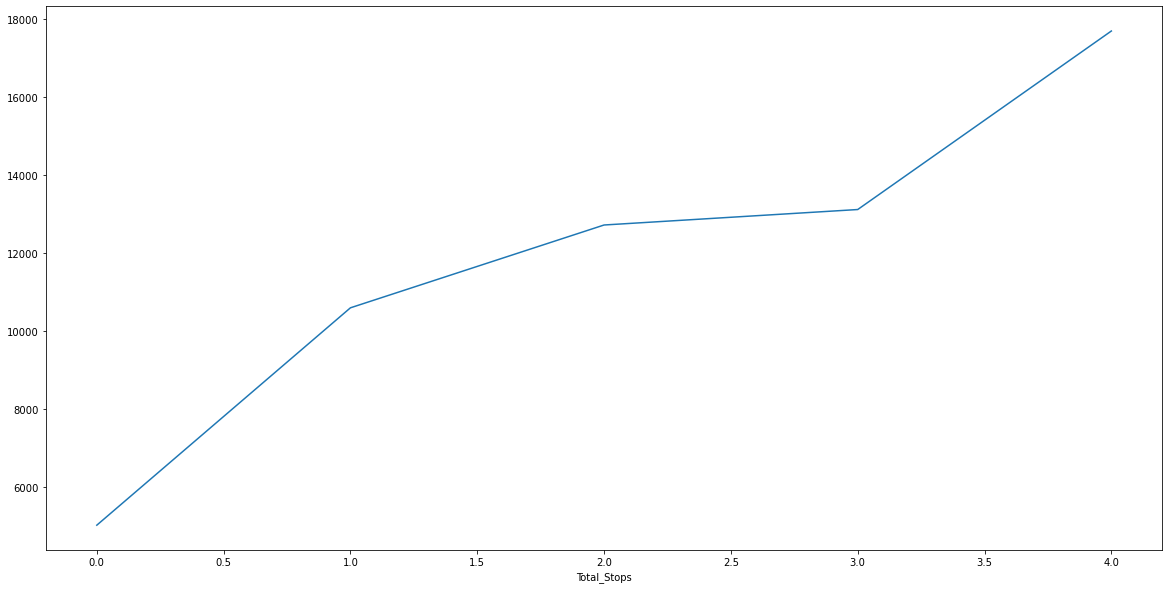

In [59]:
#avg price according to number of stops
df.groupby('Total_Stops')['Price'].mean().plot(figsize=(20,10))

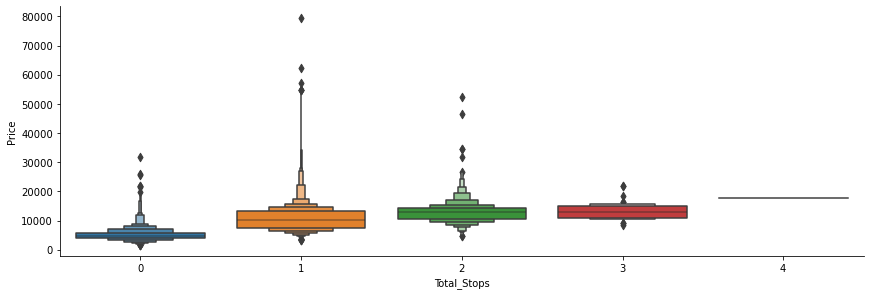

In [60]:
sns.catplot(y = "Price", x = "Total_Stops", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [61]:
df.head(1)

,Duration,Total_Stops,Price,Day_of_journey,month_of_journey,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,0,3897,24,3,1,10,22,20,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
# Extracting the hours and minute
df['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [67]:
# some row contains minute and some not
dur_lst = list(df['Duration'])
for i in range(len(dur_lst)):
    if len(dur_lst[i].split()) !=2: #checks the hous contains both hour and minute
        if "h" in dur_lst[i]:
            dur_lst[i] = dur_lst[i].strip() + " 0m"   # Adds 0 minute
        else:
            dur_lst[i] = "0h " + dur_lst[i]           # Adds 0 hour

In [69]:
# extrack hour and min
duration_hours = []
duration_mins = []
for i in range(len(dur_lst)):
    duration_hours.append(int(dur_lst[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(dur_lst[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [70]:
# Adding duration_hours and duration_mins to df
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [71]:
# drop Duration Feature
df.drop('Duration',axis=1,inplace=True)

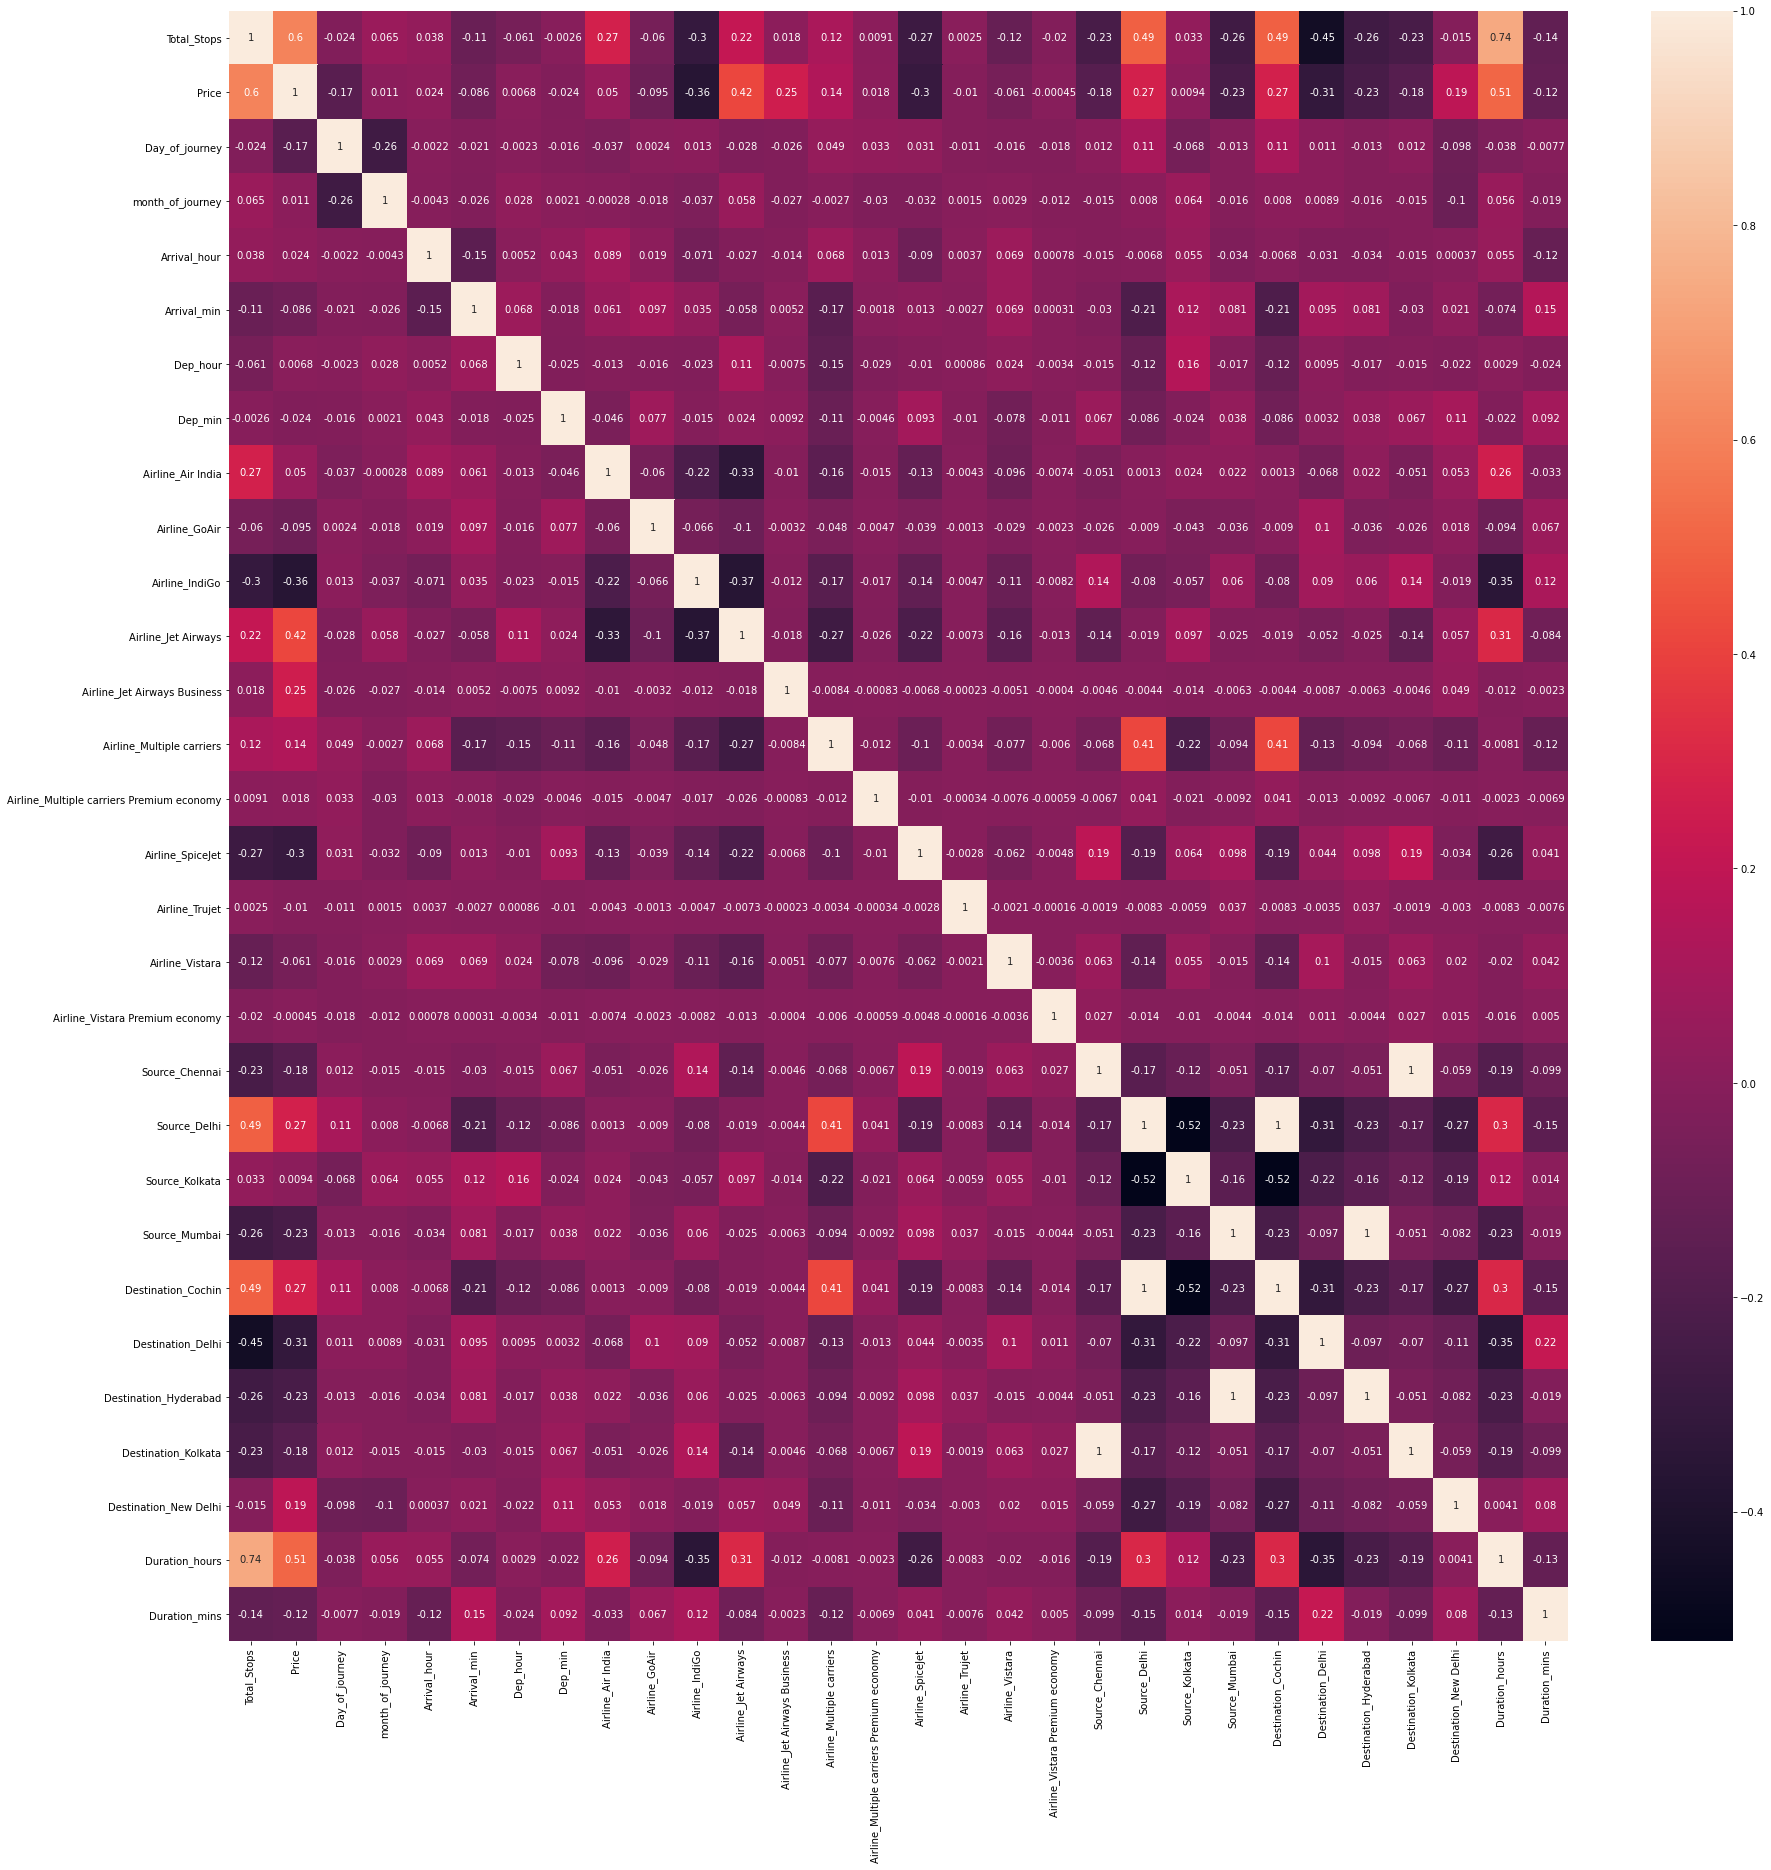

In [80]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [73]:
# Data is now ready to split and train
df.head()

,Total_Stops,Price,Day_of_journey,month_of_journey,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Airline_Air India,Airline_GoAir,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_mins
0,0,3897,24,3,1,10,22,20,0,0,...,0,0,0,0,0,0,0,1,2,50
1,2,7662,5,1,13,15,5,50,1,0,...,0,1,0,0,0,0,0,0,7,25
2,2,13882,6,9,4,25,9,25,0,0,...,1,0,0,1,0,0,0,0,19,0
3,1,6218,5,12,23,30,18,5,0,0,...,0,1,0,0,0,0,0,0,5,25
4,1,13302,3,1,21,35,16,50,0,0,...,0,0,0,0,0,0,0,1,4,45


In [76]:
# separating the data in x, y
x = df.drop('Price',axis=1)
y = df.Price

In [78]:
# spliting the data in train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40)

In [79]:
# spliting the data in test and validation
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5)

In [82]:
# converting to csv
x_train.to_csv('Data/train_features.csv',index=False)
y_train.to_csv('Data/train_label.csv',index=False)
x_test.to_csv('Data/test_features.csv',index=False)
y_test.to_csv('Data/test_label.csv',index=False)
x_val.to_csv('Data/val_features.csv',index=False)
y_val.to_csv('Data/val_label.csv',index=False)